In [ ]:
#1981-2005 

import pandas as pd

yields = pd.read_csv('U.S Treasury Bonds 1981 - 2005.csv', parse_dates=['observation_date'])
recession = pd.read_csv('USREC 1981 - 2005.csv', parse_dates=['observation_date'])
unemployment = pd.read_csv('UNRATE 1981 - 2005.csv', parse_dates=['observation_date'])
industrial_prod = pd.read_csv('INDPRO 1981-2005.csv', parse_dates=['observation_date'])

df = yields.merge(recession, on='observation_date')\
           .merge(unemployment, on='observation_date')\
           .merge(industrial_prod, on='observation_date')

# Feature Engineering
df['10y_minus_3m'] = df['DGS10'] - df['DGS3MO']
df['10y_minus_2y'] = df['DGS10'] - df['DGS2']

# Shift the recession indicator by 12 months forward
df['recession_next_year'] = df['USREC'].shift(-12)

# Drop rows with NaNs created by shifting
df = df.dropna()

# Features (X) and Target (y)
feature_cols = ['10y_minus_3m', '10y_minus_2y', 'UNRATE', 'INDPRO']
X = df[feature_cols]
y = df['recession_next_year']

print(X.head())
print(y.head())

   10y_minus_3m  10y_minus_2y  UNRATE   INDPRO
0         -0.29         -1.14     7.6  51.3429
1          0.92         -0.39     7.9  50.9463
2          2.04          0.51     8.3  50.3546
3          2.40          0.43     8.5  49.8086
4          1.67          0.02     8.6  48.7877
0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: recession_next_year, dtype: float64


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 1. Scaling the features (good practice for regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train the model (using all available data)
model = LogisticRegression()
model.fit(X_scaled, y)

# 3. Make predictions
y_pred = model.predict(X_scaled)

# 4. Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

# 5. (Optional) Predict recession probabilities
recession_prob = model.predict_proba(X_scaled)[:, 1]

# 6. Create a DataFrame to see results
prediction_df = df.copy()
prediction_df['Predicted_Recession'] = y_pred
prediction_df['Probability_Recession'] = recession_prob

print("\nFirst few predictions:\n")
print(prediction_df[['Predicted_Recession', 'Probability_Recession']].head())

Confusion Matrix:
 [[177   0]
 [  7   4]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       177
         1.0       1.00      0.36      0.53        11

    accuracy                           0.96       188
   macro avg       0.98      0.68      0.76       188
weighted avg       0.96      0.96      0.95       188


First few predictions:

   Predicted_Recession  Probability_Recession
0                  1.0               0.883267
1                  0.0               0.207529
2                  0.0               0.006076
3                  0.0               0.005590
4                  0.0               0.035014


<function matplotlib.pyplot.show(close=None, block=None)>

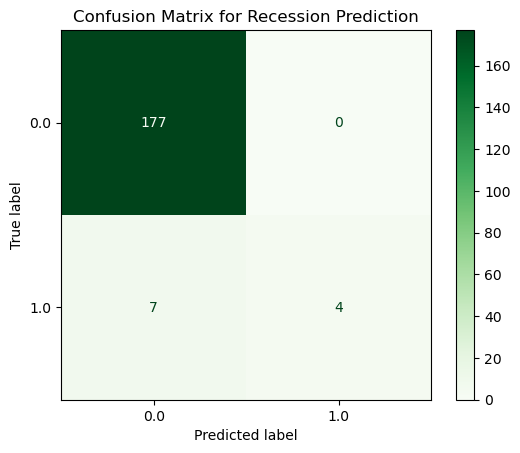

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for Recession Prediction')
plt.show

In [38]:
# Assuming your df has a datetime index or a 'date' column
# If you have 'observation_date', reset index or keep it

# Add predictions and actuals into your main dataframe
df['Actual_Recession'] = y
df['Predicted_Recession'] = y_pred

# Find where the model predicted no recession (0) but there actually was a recession (1)
missed_recessions = df[(df['Actual_Recession'] == 1) & (df['Predicted_Recession'] == 0)]

# Show the corresponding dates
print(missed_recessions.index)  # If your dates are in the index
# OR if you have a column for dates:
# print(missed_recessions['observation_date'])

Index([1, 2, 224, 225, 226, 229, 230], dtype='int64')


In [39]:
print(missed_recessions['observation_date'])

1     1981-10-01
2     1981-11-01
224   2000-05-01
225   2000-06-01
226   2000-07-01
229   2000-10-01
230   2000-11-01
Name: observation_date, dtype: datetime64[ns]


In [70]:
import pandas as pd

# Load each dataset
daaa_future = pd.read_csv('DAAA.csv', parse_dates=['observation_date'])
dbaa_future = pd.read_csv('DBAA.csv', parse_dates=['observation_date'])
indpro_future = pd.read_csv('INDPRO.csv', parse_dates=['observation_date'])
unrate_future = pd.read_csv('UNRATE.csv', parse_dates=['observation_date'])
usrec_future = pd.read_csv('USREC.csv', parse_dates=['observation_date'])
ustbond_future = pd.read_csv('USTBONDS 2005 - 2025.csv', parse_dates=['observation_date'])

# Merge all on 'observation_date'
df_future = daaa_future.merge(dbaa_future, on='observation_date') \
                       .merge(indpro_future, on='observation_date') \
                       .merge(unrate_future, on='observation_date') \
                       .merge(usrec_future, on='observation_date') \
                       .merge(ustbond_future, on='observation_date')

# See a preview
print(df_future.head())


  observation_date  DAAA  DBAA   INDPRO  UNRATE  USREC  DGS3MO  DGS6MO  DGS1  \
0       2005-01-01  5.36  6.02  95.8785     5.3      0    2.37    2.68  2.86   
1       2005-02-01  5.20  5.82  96.5709     5.4      0    2.58    2.85  3.03   
2       2005-03-01  5.40  6.06  96.4345     5.2      0    2.80    3.09  3.30   
3       2005-04-01  5.33  6.05  96.6347     5.2      0    2.84    3.14  3.32   
4       2005-05-01  5.15  6.01  96.7251     5.1      0    2.90    3.17  3.33   

   DGS2  DGS3  DGS5  DGS7  DGS10  DGS20  DGS30  
0  3.22  3.39  3.71  3.97   4.22   4.77   4.77  
1  3.38  3.54  3.77  3.97   4.17   4.61   4.56  
2  3.73  3.91  4.17  4.33   4.50   4.89   4.77  
3  3.65  3.79  4.00  4.16   4.34   4.75   4.65  
4  3.64  3.72  3.85  3.94   4.14   4.56   4.49  


In [71]:
df_future['Yield_Spread'] = df_future['DAAA'] - df_future['DBAA']


In [72]:
df_future['USTBOND'] = df_future['DGS10']  # Assuming DGS10 is your 10Y treasury yield


In [80]:
# First: select the features
features = ['DAAA', 'DBAA', 'INDPRO', 'USTBOND', 'UNRATE', 'Yield_Spread']

# Select X and y at the same time
X_future = df_future[features]
y_future = df_future['USREC']

# Drop rows with missing values at the SAME time
future_data = pd.concat([X_future, y_future], axis=1).dropna()

# Separate again after dropping NaNs
X_future = future_data[features]
y_future = future_data['USREC']


In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [83]:
y_future_pred = model.predict(X_scaled)
y_future_prob = model.predict_proba(X_scaled)[:, 1]


In [85]:
print(X_future.shape)
print(y_future.shape)


(241, 6)
(241,)


In [86]:
# Features you are using
features = ['DAAA', 'DBAA', 'INDPRO', 'USTBOND', 'UNRATE', 'Yield_Spread']

# Select all columns: features + USREC
future_data = df_future[features + ['USREC']]

# Drop any rows with missing values (NaNs)
future_data = future_data.dropna()

# Now split
X_future = future_data[features]
y_future = future_data['USREC']


In [93]:
import numpy as np

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Predict
y_future_pred = model.predict(X_scaled)
y_future_prob = model.predict_proba(X_scaled)[:, 1]

# Check new shapes
print(X_future.shape)
print(y_future.shape)

# Flatten y_future if necessary
y_future = np.array(y_future).flatten()


(241, 6)
(241,)


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('USTBONDS 2005 - 2025.CSV')

# Now `df` is a DataFrame containing your CSV data
print(df.head())

  observation_date  DGS3MO  DGS6MO  DGS1  DGS2  DGS3  DGS5  DGS7  DGS10  \
0       2005-01-01    2.37    2.68  2.86  3.22  3.39  3.71  3.97   4.22   
1       2005-02-01    2.58    2.85  3.03  3.38  3.54  3.77  3.97   4.17   
2       2005-03-01    2.80    3.09  3.30  3.73  3.91  4.17  4.33   4.50   
3       2005-04-01    2.84    3.14  3.32  3.65  3.79  4.00  4.16   4.34   
4       2005-05-01    2.90    3.17  3.33  3.64  3.72  3.85  3.94   4.14   

   DGS20  DGS30  
0   4.77   4.77  
1   4.61   4.56  
2   4.89   4.77  
3   4.75   4.65  
4   4.56   4.49  


In [ ]:
df = pd.read_csv('USREC.csv')

# Now `df` is a DataFrame containing your CSV data
print(df.head())

  observation_date  USREC
0       2005-01-01      0
1       2005-02-01      0
2       2005-03-01      0
3       2005-04-01      0
4       2005-05-01      0


In [101]:
baa = pd.read_csv('DBAA.csv', parse_dates=['observation_date'])
aaa = pd.read_csv('DAAA.csv', parse_dates=['observation_date'])


baa = baa.rename(columns={'DBAA': 'yield_baa'})
aaa = aaa.rename(columns={'DAAA': 'yield_aaa'})


df = pd.merge(baa, aaa, on='observation_date', how='inner')


df['risk_premium'] = df['yield_baa'] - df['yield_aaa']


df['year'] = df['observation_date'].dt.year
annual_prem = df.groupby('year')['risk_premium'].mean().reset_index()

print(df.head())        # monthly spread
print(annual_prem)      # yearly average spread


  observation_date  yield_baa  yield_aaa  risk_premium  year
0       2005-01-01       6.02       5.36          0.66  2005
1       2005-02-01       5.82       5.20          0.62  2005
2       2005-03-01       6.06       5.40          0.66  2005
3       2005-04-01       6.05       5.33          0.72  2005
4       2005-05-01       6.01       5.15          0.86  2005
    year  risk_premium
0   2005      0.829167
1   2006      0.891667
2   2007      0.926667
3   2008      1.815000
4   2009      1.982500
5   2010      1.095000
6   2011      1.025000
7   2012      1.261667
8   2013      0.866667
9   2014      0.691667
10  2015      1.112500
11  2016      1.051667
12  2017      0.696667
13  2018      0.870000
14  2019      0.988333
15  2020      1.125833
16  2021      0.690000
17  2022      0.998333
18  2023      1.050833
19  2024      0.709167
20  2025      0.620000


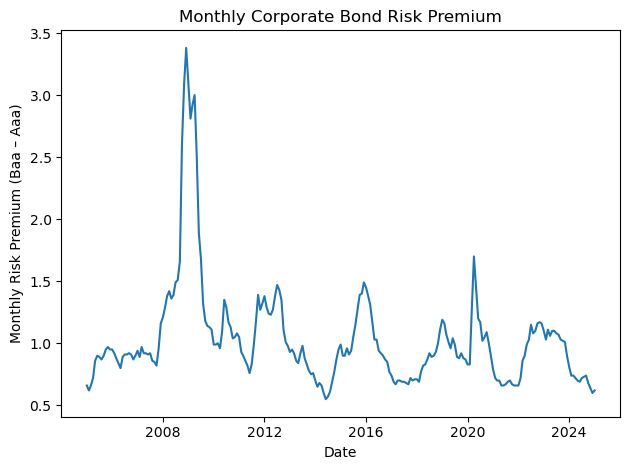

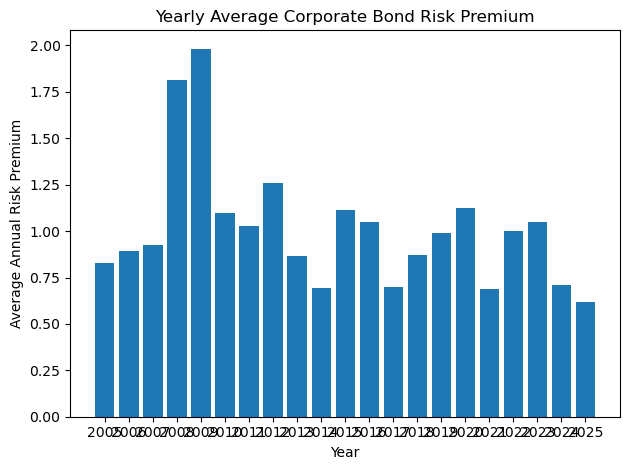

In [102]:
fig, ax = plt.subplots()
ax.plot(df['observation_date'], df['risk_premium'])
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Risk Premium (Baa – Aaa)')
ax.set_title('Monthly Corporate Bond Risk Premium')
plt.tight_layout()

# 2) Annual Average Risk Premium
fig, ax = plt.subplots()
ax.bar(annual_prem['year'].astype(str), annual_prem['risk_premium'])
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Risk Premium')
ax.set_title('Yearly Average Corporate Bond Risk Premium')
plt.tight_layout()

plt.show()


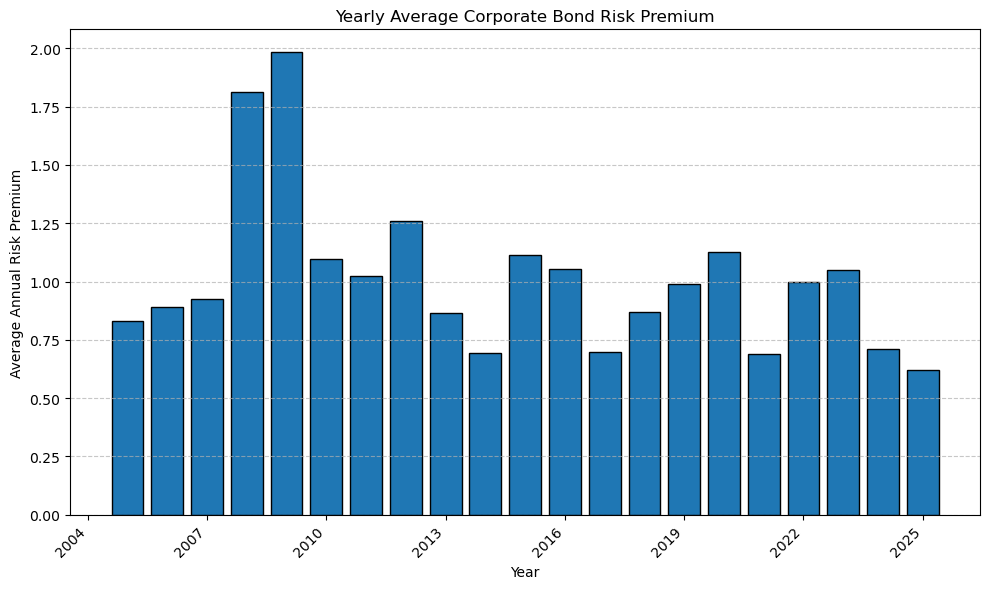

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

years = annual_prem['year']
premiums = annual_prem['risk_premium']

fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
ax.bar(years, premiums, edgecolor='black')

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Risk Premium')
ax.set_title('Yearly Average Corporate Bond Risk Premium')

# Force integer ticks and reduce the number of ticks
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

# Rotate tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [105]:
import pandas as pd

# Load all your datasets
yields = pd.read_csv('USTBONDS 2005 - 2025.csv', parse_dates=['observation_date'])
recession = pd.read_csv('USREC.csv', parse_dates=['observation_date'])
unemployment = pd.read_csv('UNRATE.csv', parse_dates=['observation_date'])
industrial_prod = pd.read_csv('INDPRO.csv', parse_dates=['observation_date'])

# Merge everything by observation_date
df = yields.merge(recession, on='observation_date')\
           .merge(unemployment, on='observation_date')\
           .merge(industrial_prod, on='observation_date')

# Feature Engineering
df['10y_minus_3m'] = df['DGS10'] - df['DGS3MO']
df['10y_minus_2y'] = df['DGS10'] - df['DGS2']

# Shift the recession indicator by 12 months forward
df['recession_next_year'] = df['USREC'].shift(-12)

# Drop rows with NaNs created by shifting
df = df.dropna()

# Features (X) and Target (y)
feature_cols = ['10y_minus_3m', '10y_minus_2y', 'UNRATE', 'INDPRO']
X = df[feature_cols]
y = df['recession_next_year']

print(X.head())
print(y.head())

   10y_minus_3m  10y_minus_2y  UNRATE   INDPRO
0          1.85          1.00     5.3  95.8785
1          1.59          0.79     5.4  96.5709
2          1.70          0.77     5.2  96.4345
3          1.50          0.69     5.2  96.6347
4          1.24          0.50     5.1  96.7251
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: recession_next_year, dtype: float64


In [8]:
ls

 O volume na unidade G � Google Drive
 O N�mero de S�rie do Volume � 1983-1116

 Pasta de g:\Meu Drive\DS 325\DelenaYusuf_yieldcurve

04/28/2025  03:05 PM    <DIR>          .
04/28/2025  03:12 PM    <DIR>          ..
04/28/2025  03:12 PM    <DIR>          .git
04/17/2025  05:09 PM             3,878 DAAA.csv
04/17/2025  05:07 PM             3,878 DBAA.csv
04/17/2025  04:19 PM            15,020 DS 325 Final Project.csv
04/17/2025  04:19 PM            28,902 DS 325 Final Project.xlsx
04/28/2025  03:03 PM           224,999 ds final project.ipynb
04/28/2025  03:02 PM             4,964 INDPRO.csv
04/28/2025  03:02 PM             3,889 UNRATE.csv
04/17/2025  04:43 PM             3,401 USREC.csv
               8 arquivo(s)        288,931 bytes
               3 pasta(s)   15,266,615,296 bytes dispon�veis


Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        44
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        46
   macro avg       0.48      0.50      0.49        46
weighted avg       0.91      0.96      0.94        46



c:\Users\delen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\delen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\delen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


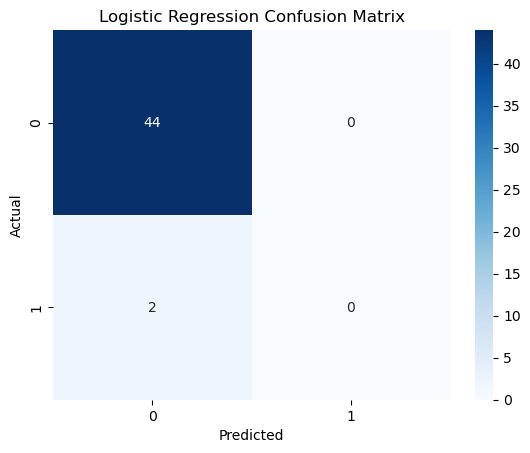

Model: Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        44
         1.0       0.40      1.00      0.57         2

    accuracy                           0.93        46
   macro avg       0.70      0.97      0.77        46
weighted avg       0.97      0.93      0.95        46



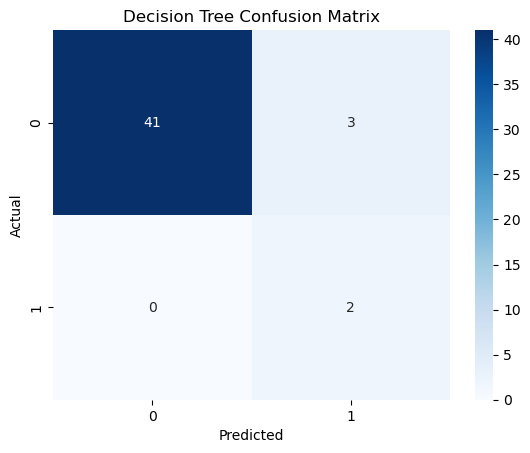

Model: Random Forest
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        44
         1.0       0.50      1.00      0.67         2

    accuracy                           0.96        46
   macro avg       0.75      0.98      0.82        46
weighted avg       0.98      0.96      0.96        46



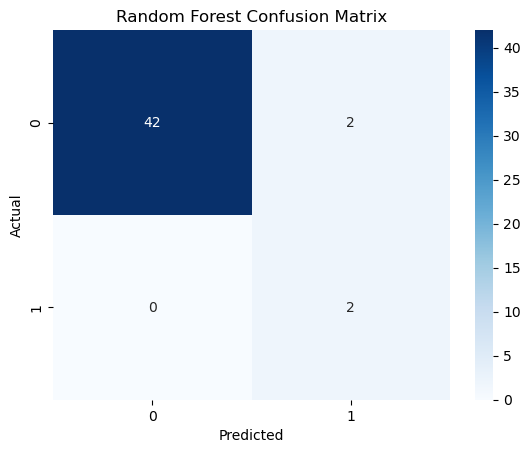

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print Evaluation
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [10]:
models

{'Logistic Regression': LogisticRegression(max_iter=1000),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier()}

In [20]:
models['Decision Tree'].feature_importances_
feature_names = models['Decision Tree'].feature_names_in_


{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['10y_minus_3m', '10y_minus_2y', 'UNRATE', 'INDPRO'], dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array([0., 1.]),
 'n_classes_': 2,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x232087230c0>}

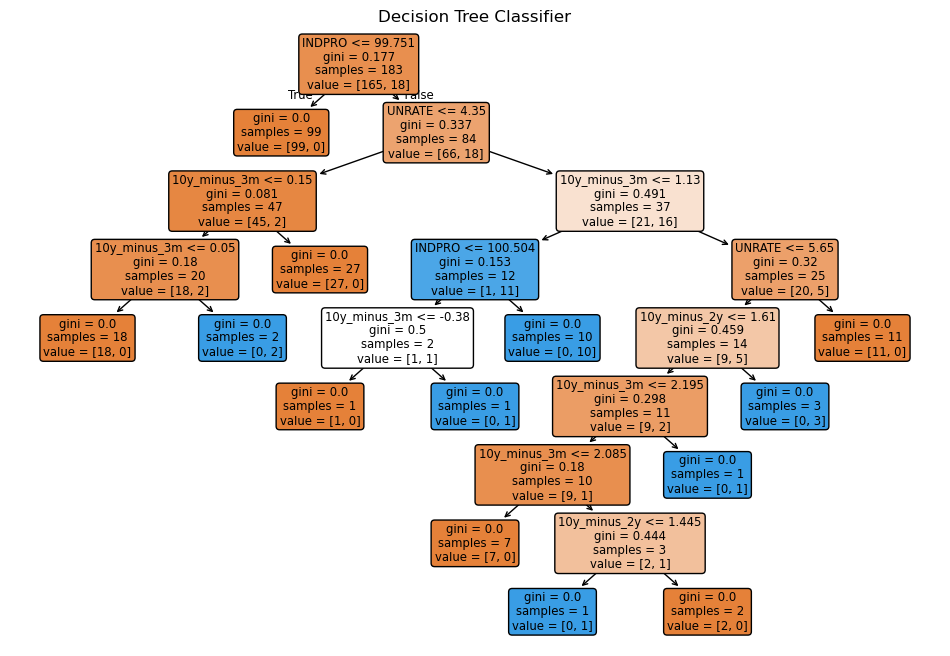

In [21]:

from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(models['Decision Tree'], feature_names=feature_names, filled=True, rounded=True)
plt.title('Decision Tree Classifier') 
models['Decision Tree'].__dict__

In [22]:
models['Random Forest'].feature_importances_

array([0.23010535, 0.18206775, 0.29897678, 0.28885011])

In [23]:
models['Logistic Regression'].coef_

array([[-0.57122976,  0.92240038, -0.09912374,  0.34191582]])

In [24]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
X_train

,10y_minus_3m,10y_minus_2y,UNRATE,INDPRO
150,1.23,0.95,4.3,100.0865
55,3.42,2.47,9.6,86.6393
165,0.86,0.29,3.8,103.9297
69,2.41,2.16,9.4,92.6033
167,0.42,0.15,3.9,104.0451
...,...,...,...,...
106,2.65,2.42,6.9,100.1582
14,0.09,-0.01,4.7,98.3913
92,1.61,1.46,7.8,97.2217
179,0.29,0.25,3.6,101.9421


In [27]:
X

,10y_minus_3m,10y_minus_2y,UNRATE,INDPRO
0,1.85,1.00,5.3,95.8785
1,1.59,0.79,5.4,96.5709
2,1.70,0.77,5.2,96.4345
3,1.50,0.69,5.2,96.6347
4,1.24,0.50,5.1,96.7251
...,...,...,...,...
224,-1.18,-0.64,3.8,103.3081
225,-0.80,-0.27,3.9,102.5781
226,-1.02,-0.38,3.7,102.8868
227,-1.42,-0.44,3.8,102.6309


In [29]:
y_pred = models['Random Forest'].predict(X)
df.iloc[y_pred==1]

,observation_date,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30,USREC,UNRATE,INDPRO,10y_minus_3m,10y_minus_2y,recession_next_year
24,2007-01-01,5.11,5.15,5.06,4.88,4.79,4.75,4.75,4.76,4.95,4.85,0,4.6,99.7546,-0.35,-0.12,1.0
26,2007-03-01,5.08,5.10,4.92,4.57,4.51,4.48,4.50,4.56,4.81,4.72,0,4.4,100.8952,-0.52,-0.01,1.0
27,2007-04-01,5.01,5.07,4.93,4.67,4.60,4.59,4.62,4.69,4.95,4.87,0,4.5,101.5723,-0.32,0.02,1.0
28,2007-05-01,4.87,4.98,4.91,4.77,4.69,4.67,4.69,4.75,4.98,4.90,0,4.4,101.6269,-0.12,-0.02,1.0
29,2007-06-01,4.74,4.95,4.96,4.98,5.00,5.03,5.05,5.10,5.29,5.20,0,4.6,101.6547,0.36,0.12,1.0
30,2007-07-01,4.96,5.04,4.96,4.82,4.82,4.88,4.93,5.00,5.19,5.11,0,4.7,101.4953,0.04,0.18,1.0
31,2007-08-01,4.32,4.55,4.47,4.31,4.34,4.43,4.53,4.67,5.00,4.93,0,4.6,101.6943,0.35,0.36,1.0
32,2007-09-01,3.99,4.20,4.14,4.01,4.06,4.20,4.33,4.52,4.84,4.79,0,4.7,101.9428,0.53,0.51,1.0
33,2007-10-01,4.00,4.16,4.10,3.97,4.01,4.20,4.33,4.53,4.83,4.77,0,4.7,101.6446,0.53,0.56,1.0
34,2007-11-01,3.35,3.58,3.50,3.34,3.35,3.67,3.87,4.15,4.56,4.52,0,4.7,102.2167,0.80,0.81,1.0
